
## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

## Part 0: Import Packages

For this notebook, you will need to import: 

- `numpy`
- `pandas`
- `matplotlib`
- `StandardScaler`
- `tensorflow`
- `keras`
- `Sequential`
- `Dense`
- `GridSearchCV`
- `KerasClassifier`

You will also need to install `!pip install mlxtend` if you are working on a notebook. **Be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash.**



In [ ]:
# YOUR CODE HERE
import numpy as np # numpy
import pandas as pd # pandas
import matplotlib.pyplot as plt # matplotlib
import seaborn as sns # seaborn (for plotting)
import tensorflow as tf # tensorflow 
from tensorflow.keras import Sequential # sequential 
from tensorflow.keras.layers import Dense # dense 
from sklearn.model_selection import GridSearchCV # GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier #KerasClassifier 
# from tensorflow.keras.optimizers import SGD

In [ ]:
# from tensorflow.python.keras import Sequential

In [ ]:
# Visible Testing
assert pd.__package__ == 'pandas'
assert GridSearchCV.__module__ == 'sklearn.model_selection._search'

<a id="Q1"></a>
## Part 1: Review: 
### Defining Neural Networks 


- **Neuron:** An individual node of a neural network. It takes in a combination of inputs and weights, multiplies them together, adds a bias term, and then passes the result through an activation function. The result of this process is what the neuron will pass onto the subsequent layer. Neural Network nodes are modeled after the neurons in the human brain. They have a activation function that decides how much signal to pass onto other neurons. In the human brain there is an electrochemical threshold that decides when and when not to fire. 
- **Input Layer:** The first layer of nodes in a neural network. This layer receives values from our dataset and combines them with the weights and biases before passing the data to the first hidden layer. 
- **Hidden Layer:** The middle layers of a neural network that are not the input layer or output layer. These nodes perform the same operations as all others, but are not directly accessible during training. Having multiple hidden layers in a neural network architecture is what determines the designation of "Deep Learning."
- **Output Layer:** The final layer of our neural network, the output layer outputs our model's final predictions. For regression problems this is a single node that outputs a continuous value. For binary classification, it is a single node that outputs a probability between 0 & 1, and for multi-class implementations the output layer typically includes a node for each of the classes that we are trying to predict.
- **Activation:** Activation functions express how strongly or weakly signal should be passed to the next layer given the weighted sum of the previous input + a bias term. The resulting output is usually referred to as an 'activation'. 

<a id="Q2"></a>
## Part 2. Simple Perceptron

For this task, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [ ]:
"""
Our Dataset
"""


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [ ]:
X.shape

(300, 2)

In [ ]:
y.shape

(300,)

In [ ]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
X


array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

### 2a. Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.
---
* Your model should be called `model1`. 

* The results of your fit model should be assigned to a variable called `h1`. 


In [ ]:
# build and fit model

# YOUR CODE HERE
#Instantiate a sequential model 
model1 = Sequential()

#Add a dense layer with single neuron 
model1.add(Dense(1, #1 neuron
                activation='sigmoid'))

#Compile model and indicate network-level params
model1.compile(loss='binary_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=10)



Epoch 1/10
10/10 [==============================] - 1s 6ms/step - loss: 0.8482 - accuracy: 0.4667
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.4667
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.8352 - accuracy: 0.4700
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.8297 - accuracy: 0.4667
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.8242 - accuracy: 0.4700
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8185 - accuracy: 0.4633
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.4633
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8080 - accuracy: 0.4633
Epoch 9/10
10/10 [==============================] - 0s 7ms/step - loss: 0.8031 - accuracy: 0.4633
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 0.7984 - accuracy: 0.4633


In [ ]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### 2b. Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `myCallback` function below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [ ]:
#do not delete or modify
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

In [ ]:
X_test.shape

(150, 2)

In [ ]:
X_train.shape

(150, 2)

In [ ]:
y_train.shape

(150,)

In [ ]:
# instantiate a sequential model
model2 = Sequential()

# add a dense layer
# with some layer-specific hyperparameters

model2.add(Dense(32, activation='relu', input_dim=2)) 
# model2.add(Dense(12, activation='relu')) 
model2.add(Dense(12, activation='relu')) 
model2.add(Dense(1, activation='elu'))

# compile the model 
# locks the model architecture. 
# indicate network-level hyperparameters
model2.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy']) 

# fit the model 
h2 = model2.fit(X_train,
                y_train,
                epochs=100, 
                validation_data=(X_test, y_test),
                callbacks=[myCallback()])

Epoch 1/100
5/5 [==============================] - 1s 88ms/step - loss: 2.6704 - accuracy: 0.6333 - val_loss: 2.7923 - val_accuracy: 0.6267
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 2.2966 - accuracy: 0.6200 - val_loss: 2.4443 - val_accuracy: 0.6267
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 2.1898 - accuracy: 0.6267 - val_loss: 2.3562 - val_accuracy: 0.6400
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 1.9803 - accuracy: 0.6400 - val_loss: 2.0179 - val_accuracy: 0.6467
Epoch 5/100
5/5 [==============================] - 0s 26ms/step - loss: 1.6617 - accuracy: 0.6600 - val_loss: 1.6634 - val_accuracy: 0.6467
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 1.5306 - accuracy: 0.6667 - val_loss: 1.2532 - val_accuracy: 0.6533
Epoch 7/100
5/5 [==============================] - 0s 21ms/step - loss: 1.0796 - accuracy: 0.6667 - val_loss: 0.8605 - val_accuracy: 0.6600
Epoch 8/100
5/5 [===

In [ ]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

In [ ]:
h2.history

{'loss': [2.670442819595337,
  2.2966487407684326,
  2.1898417472839355,
  1.9803214073181152,
  1.6616606712341309,
  1.5306240320205688,
  1.079641580581665,
  0.7272243499755859,
  0.6677443981170654,
  0.641130805015564,
  0.6200234889984131,
  0.6025139689445496,
  0.5878023505210876,
  0.5739016532897949,
  0.5597056150436401,
  0.5471396446228027,
  0.5346450805664062,
  0.5245383381843567,
  0.5155995488166809,
  0.506270170211792,
  0.49768123030662537,
  0.48994842171669006,
  0.4820506274700165,
  0.4741818606853485,
  0.466524213552475,
  0.45901358127593994,
  0.4513114392757416,
  0.4443608224391937,
  0.4382578432559967,
  0.4319208860397339,
  0.4258553385734558,
  0.42020732164382935,
  0.41417455673217773,
  0.4084218144416809,
  0.4025861620903015,
  0.39685508608818054,
  0.3910221457481384,
  0.38428395986557007,
  0.37867018580436707,
  0.3721748888492584,
  0.3661437928676605,
  0.3599676191806793,
  0.35412755608558655,
  0.34771546721458435,
  0.341993063688278

### 2c. Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [ ]:
# !pip install mlxtend

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


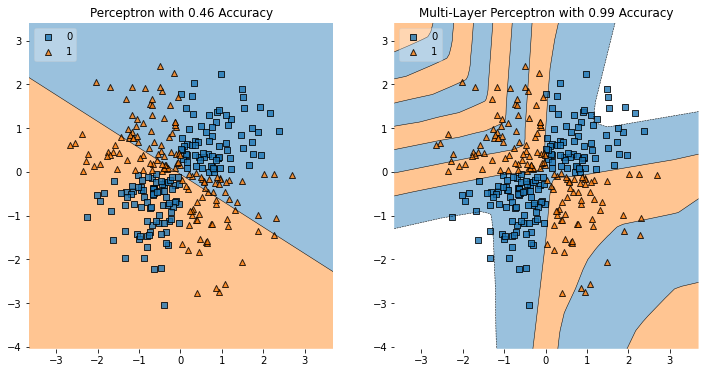

In [ ]:
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### Review
1) Why does the Perceptron (model1) only achieve about 50% accuracy?

A simple perceptron can only learn a linear decision boundary as seen in the visualization above. Since the data points are distributed in a way where only a single class is represented per quadrant, a linear decision boundary can never reach an accuracy much higher than about 50% since each class will be equally represented on either side of that linear decision boundary.

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and Y?

The additional layers and neurons allow a neural networks to learn non-linear relationships between X and Y. Each layer in a neural net represents an N-dimensional vector space. So by passing data from one layer to another, we are passing a data vector from one vector space to another, each with a different dimensions, often times this will change the geometry of the data points (i.e. their distribution in space) in such a way where a linear separation then becomes possible. This is the same idea behind the Kernel Trick in Support Vector Machines (SVM). 

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [ ]:
# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0


In [ ]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

# YOUR CODE HERE
target = 'target'
Y=df['target']
X = df.drop(columns=target)

In [ ]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [ ]:
# from tensorflow.keras.models import Sequential # sequential 

In [ ]:
from tensorflow.python.keras import Sequential

In [ ]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
# YOUR CODE HERE
def create_model(units=32, optimizer='adam', activation='sigmoid'):
    """"mmode
    Returns a compiled keras model 
    
    Parameters
    ----------
    units: int 
        number of neruons/nodes/units to use in each hidden layer
        
    Returns
    -------
    model: keras object 
    """
    
    model = Sequential()
    model.add(Dense(units, input_dim=13, activation=activation))
    model.add(Dense(10, activation='sigmoid')) 
    
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy']) 
    
    return model

In [ ]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [ ]:
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier #KerasClassifier 

In [ ]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE
model = KerasClassifier(build_fn=create_model)

In [ ]:
model.__module__

'tensorflow.python.keras.wrappers.scikit_learn'

In [ ]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [ ]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

# YOUR CODE HERE
param_grid = {'units':[64, 128],
              'activation': ['sigmoid', 'relu']}

In [ ]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [ ]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
# YOUR CODE HERE
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=2, cv=3)
grid_result = grid.fit(X, Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
4/4 [==============================] - 0s 2ms/step - loss: 2.9336 - accuracy: 0.0000e+00
[CV] END .......................activation=sigmoid, units=64; total time=   0.7s
4/4 [==============================] - 0s 3ms/step - loss: 1.8496 - accuracy: 0.2277
[CV] END .......................activation=sigmoid, units=64; total time=   0.6s
4/4 [==============================] - 0s 3ms/step - loss: 1.9021 - accuracy: 0.4554
[CV] END .......................activation=sigmoid, units=64; total time=   0.6s
4/4 [==============================] - 0s 3ms/step - loss: 2.2622 - accuracy: 0.4554
[CV] END ......................activation=sigmoid, units=128; total time=   0.6s
4/4 [==============================] - 0s 3ms/step - loss: 1.3428 - accuracy: 0.7426
[CV] END ......................activation=sigmoid, units=128; total time=   0.6s
4/4 [==============================] - 0s 3ms/step - loss: 2.0547 - accuracy: 0.4950
[CV] END ............

In [ ]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.5643564462661743 using {'activation': 'sigmoid', 'units': 128}
Means: 0.22772277891635895, Stdev: 0.18593487038456752 with: {'activation': 'sigmoid', 'units': 64}
Means: 0.5643564462661743, Stdev: 0.12705199440126103 with: {'activation': 'sigmoid', 'units': 128}
Means: 0.1254125436147054, Stdev: 0.1773601200716237 with: {'activation': 'relu', 'units': 64}
Means: 0.19141914447148642, Stdev: 0.19873359213994155 with: {'activation': 'relu', 'units': 128}
